# Part 1: Running DeC and ADER on simple scalar linear problem

We solve $$ u_t = \lambda u, \quad \lambda \in R < 0. $$ 

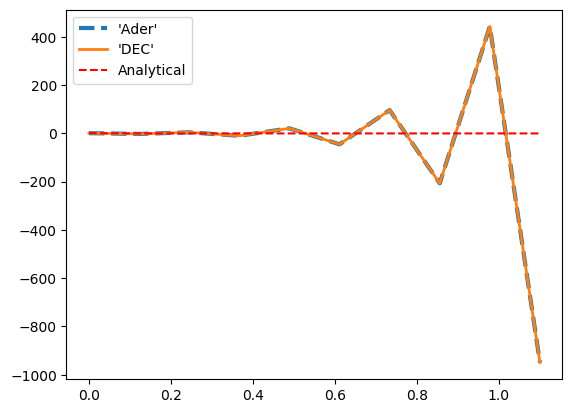

PyObject <matplotlib.legend.Legend object at 0x147198d50>

In [1]:
using PyPlot

include("ADER.jl")
include("DeC.jl")

""" Testing the linear  problem y'=y=> y(t)=exp(t) """
function stab_func(u,lambda=-25)
    d=lambda*u
    return  d
end

u0 = [1]
dim = length(u0)
tt = range(0,stop=1.1,length=10)

t2,U2 = ADER_ODE(stab_func, tt, u0, 2,3,"equispaced")
t1,U1 = dec_Remi(stab_func, tt, u0, 2,3,"equispaced")
u_analitical = [exp(stab_func(x)) for x in tt]

PyPlot.plot(t2,U2[:],label="'Ader'",linestyle="--",linewidth = 3)
PyPlot.plot(t1,U1[:],label="'DEC'",linestyle="-",linewidth = 2)
PyPlot.plot(t2,u_analitical,label="Analytical",linestyle="--",color="red")
PyPlot.legend()

# Compute stability region for DeC and ADER

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[2]:92
└ @ Core In[2]:92
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[2]:92
└ @ Core In[2]:92
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[2]:93
└ @ Core In[2]:93
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[2]:93
└ @ Core In[2]:93
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of 

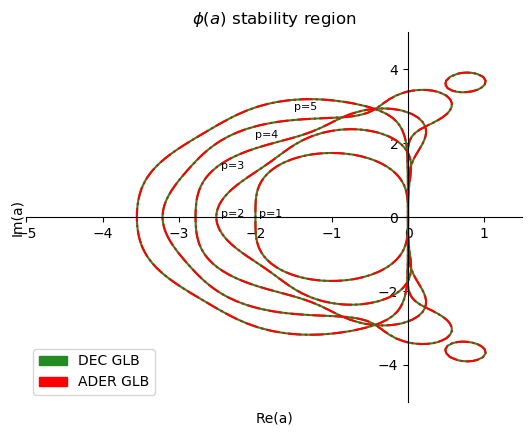

In [2]:
using FastGaussQuadrature, Compat
using LinearAlgebra
using LaTeXStrings
ENV["MPLBACKEND"]="tkagg"
"""Different models"""

num_cores= Threads.nthreads()

##Convergence test for the linear model
u0=[1+0im]
dim = length(u0)

redim=100;
imdim=100;
AA=zeros(ComplexF64, redim,imdim);
remin=-5;
remax=1.5;
immin=-5; 
immax=5;
relins=range(remin,stop=remax,length=redim);
imlins=range(immin,stop=immax,length=imdim);

RES=zeros(redim,imdim);
RR=zeros(redim,imdim);
II=zeros(redim,imdim);
    
relins=range(remin,stop=remax,length=redim);
imlins=range(immin,stop=immax,length=imdim);

AA_ader=zeros(ComplexF64, redim,imdim);
RES_ader=zeros(redim,imdim);
RR_ader=zeros(redim,imdim);
II_ader=zeros(redim,imdim);
    

RES_ader_gll=zeros(redim,imdim);
    
PL =0
PL2 = 0
locsx = [-1.95,-2.45,-2.45,-2,-1.5]
locsy = [0.0,0.0,1.3,2.15,2.9]
for order = 1:5
	for k=1:redim
		for j = 1:imdim
			re=relins[k]; imm =imlins[j]; aa=re+1im*imm;
			RR[k,j]=re;
			II[k,j]=imm;
			AA[k,j] = aa;
            U=dec_Remi_Stab(stab_func,u0,aa, order,order+1, "gaussLobatto");
			RES[k,j]=abs(U[1,end]);
			RR_ader[k,j]=re;
			II_ader[k,j]=imm;
			AA_ader[k,j] = aa;
            
			U = ADER_ODE_stab(stab_func_complex,u0,aa, order,order+1, "gaussLobatto");
            RES_ader[k,j]=abs(U[1,end]);
                
		end
	end

    levels_color=[0,1]
    PyPlot.contour(RR,II,RES,levels_color,linestyles="-",label="DEC",colors="forestgreen")
    PyPlot.contour(RR_ader,II_ader,RES_ader,levels_color,linewidths=1.5,colors="red",label="ADER",alpha=1,linestyles="-.")
    PyPlot.text(locsx[order],locsy[order],"p=$(order)",fontsize=8)

    end
    
	
    
proxy = [plt.Rectangle((0,0),0.5,0.5,color="forestgreen"),plt.Rectangle((0,0),1,1,color="red"),plt.Rectangle((0,0),1,1,color="blue")] 

plt.legend(proxy, ["DEC GLB", "ADER GLB"],loc="lower left")
    

PyPlot.xlabel("Re(a)")
PyPlot.ylabel("Im(a)")
PyPlot.title(L"$\phi(a)$ stability region")
ax = gca() 
ax[:spines]["left"][:set_position]("zero")
ax[:spines]["bottom"][:set_position]("zero")
ax[:spines]["right"].set_visible(false)
ax[:spines]["top"].set_visible(false)
ax[:xaxis].set_label_coords(0.5, -0.025)
ax[:yaxis].set_label_coords(-0.005, 0.5)

PyPlot.show()
PyPlot.savefig("stab_glb.pdf",dpi=300)

In [ ]:
import Pkg; Pkg.add("LaTeXStrings")